> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 예시

- y = 10 - 3x + epsilon
- epsilon ~ N(0, 3^2)  

In [1]:
num_obs <- 30
beta0 <- 10
beta1 <- -3
sigma <- 3

In [2]:

set.seed(1)
epsilon <-  rnorm(n = num_obs, mean = 0, sd = sigma)


In [3]:
x <- 1:num_obs
y <- beta0 + beta1*x + epsilon


In [4]:
sim_model1 <- lm(y~x)
summary(sim_model1)



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9439 -1.3193  0.3063  1.8845  4.1365 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78911    1.05002   10.28 5.27e-11 ***
x           -3.03495    0.05915  -51.31  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.804 on 28 degrees of freedom
Multiple R-squared:  0.9895,	Adjusted R-squared:  0.9891 
F-statistic:  2633 on 1 and 28 DF,  p-value: < 2.2e-16


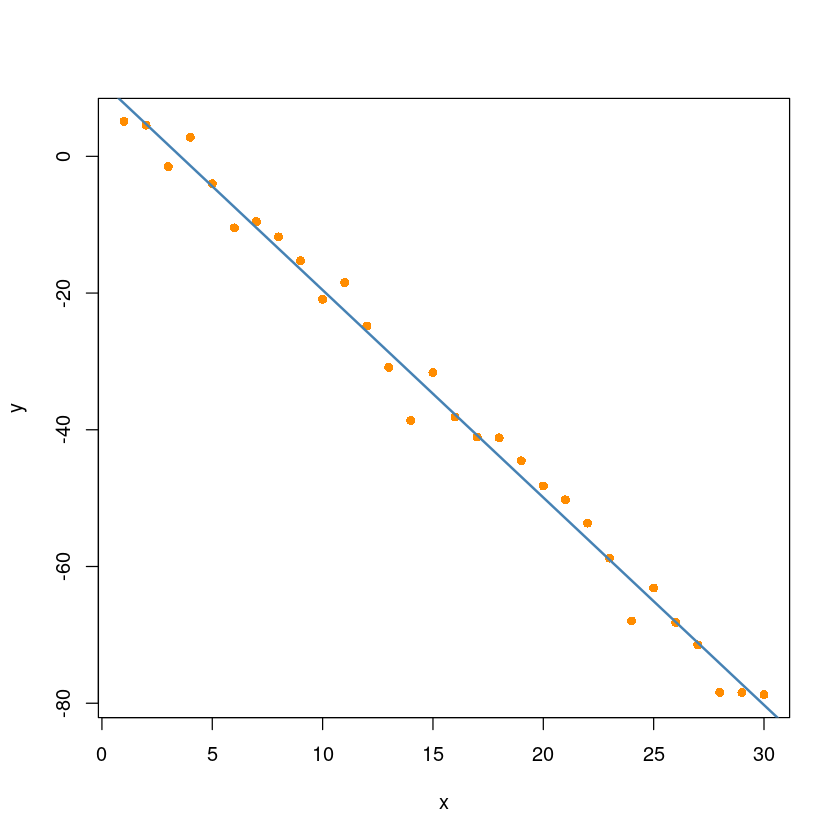

In [5]:
plot(y ~ x, pch=16, col='darkorange')
abline(sim_model1, col='steelblue', lwd=2)


In [6]:
confint(sim_model1, level = 0.95)


,2.5 %,97.5 %
(Intercept),8.638235,12.939986
x,-3.156107,-2.913795


## The function to generate simulation data

In [7]:
generating_slr = function(x, beta0, beta1, sigma) {
  set.seed(1)
  n = length(x)
  epsilon = rnorm(n, mean = 0, sd = sigma)
  y = beta0 + beta1 * x + epsilon
  data.frame(x,y)
}

In [8]:
par(mfrow=c(1,2))
x <- 1:10 
beta0 <- 10
beta1 <- -3
sigma <- 3

In [11]:
sim_dat <- generating_slr(x, beta0, beta1, sigma)
sim_fit <- lm(y~x, data = sim_dat)


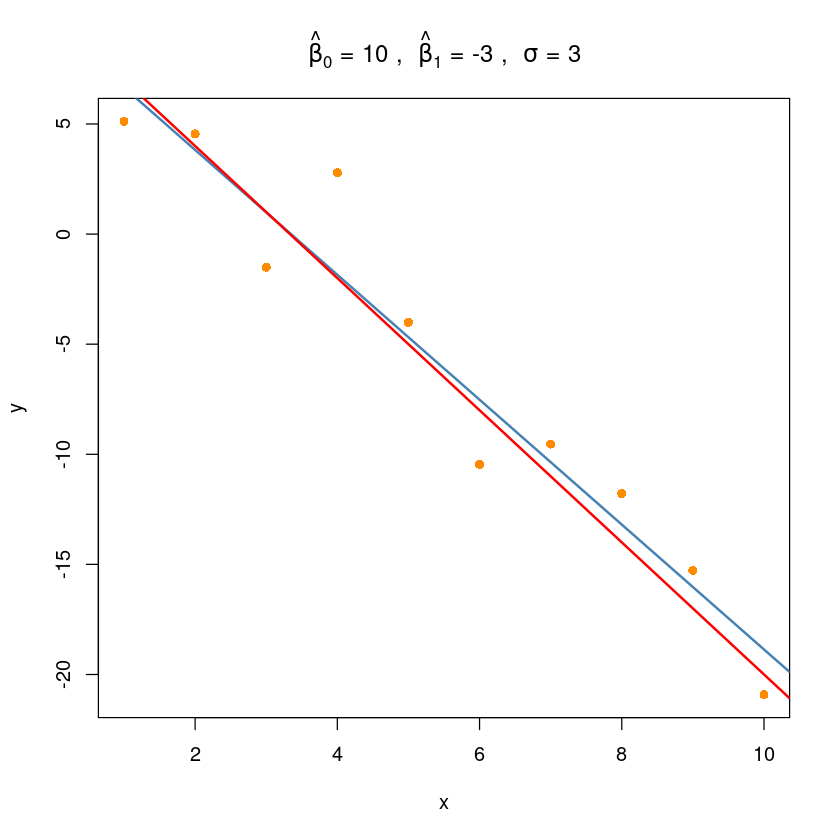

In [13]:
plot(y ~ x, data = sim_dat, 
     pch=16, col='darkorange',
     main =bquote(hat(beta)[0] ~ "="~.(beta0) ~ ", " ~
                    hat(beta)[1] ~ "="~.(beta1)~ ", " ~
                    sigma ~"="~ .(sigma)))
abline(sim_fit, col='steelblue', lwd=2)
abline(10, -3, col='red', lwd=2)


In [15]:
summary(sim_fit)



Call:
lm(formula = y ~ x, data = sim_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9401 -1.9230  0.7015  0.8036  4.6355 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4935     1.6581   5.726 0.000441 ***
x            -2.8358     0.2672 -10.612 5.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.427 on 8 degrees of freedom
Multiple R-squared:  0.9337,	Adjusted R-squared:  0.9254 
F-statistic: 112.6 on 1 and 8 DF,  p-value: 5.438e-06


## 회귀계수

hat beta0 ~ N(beta0, Var(hat beta0))


hat beta1 ~ N(beta1, Var(hat beta1))



In [16]:
num_samples = 10000

In [17]:
beta0_hats = rep(0, num_samples)
beta1_hats = rep(0, num_samples)

In [18]:
x1 <- seq(3,7, lenth.out=20)
x2 <- seq(1,10, lenth.out=20)
beta0 <- 10
beta1 <- -3
sigma <- 3


Warning message:
“In seq.default(3, 7, lenth.out = 20) :
 extra argument ‘lenth.out’ will be disregarded”
Warning message:
“In seq.default(1, 10, lenth.out = 20) :
 extra argument ‘lenth.out’ will be disregarded”


In [19]:
tmp_dt1 <- generating_slr(x1, beta0, beta1, sigma)
tmp_dt2 <- generating_slr(x2, beta0, beta1, sigma)

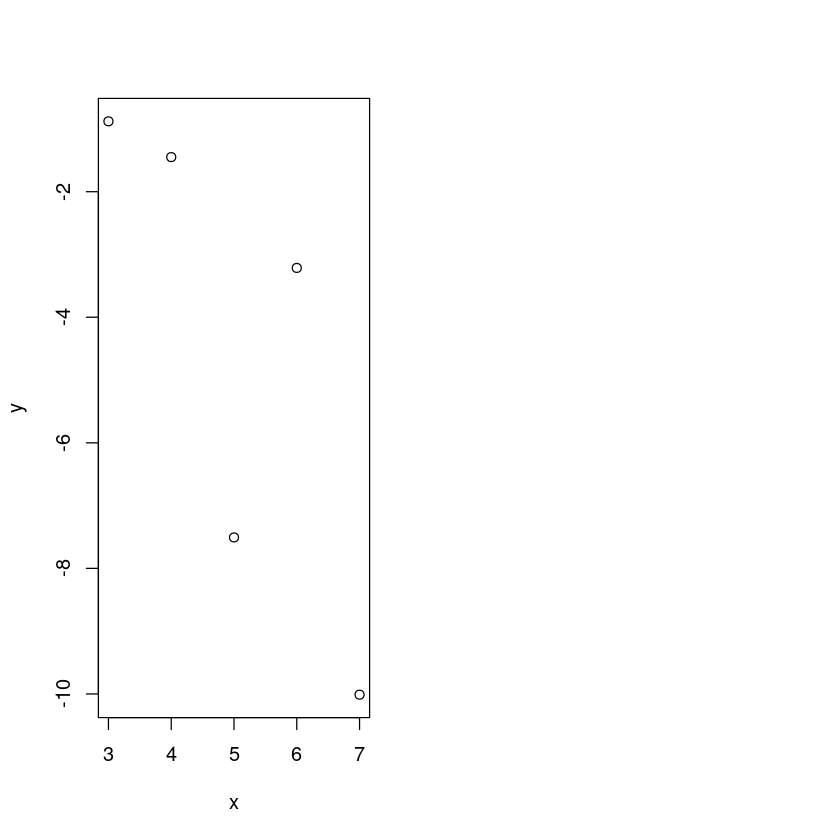

In [20]:
par(mfrow=c(1,2))
plot(y~x, tmp_dt1)

In [21]:
m1 <- lm(y~x, tmp_dt1)
m2 <- lm(y~x, tmp_dt2)

In [22]:

summary(m1)$coef
summary(m2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.402469,4.5800907,1.179555,0.3231998
x,-2.002932,0.8814389,-2.272343,0.1076921


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.493529,1.6580904,5.72558,4.411935e-04
x,-2.835804,0.2672255,-10.61203,5.438402e-06


In [23]:

num_samples = 10000

beta0_hats = rep(0, num_samples)
beta1_hats = rep(0, num_samples)

In [24]:


x <- 1:10 
beta0 <- 10
beta1 <- -3
sigma <- 3

set.seed(1004)

In [25]:

for (i in 1:num_samples) {
  tmp_dt <- generating_slr(x, beta0, beta1, sigma)
  
  sim_fit = lm(y ~ x, tmp_dt)
  
  beta0_hats[i] = coef(sim_fit)[1]
  beta1_hats[i] = coef(sim_fit)[2]
}


In [26]:

## beta1
head(beta1_hats)

[1] -2.835804 -2.835804 -2.835804 -2.835804 -2.835804 -2.835804

In [27]:

mean(beta1_hats)  ## empirical mean of beta1_hat

[1] -2.835804

In [28]:
beta1 ## true mean of beta1_hat

[1] -3

In [29]:

var(beta1_hats)  ## empirical variance of beta1_hat

[1] 0

In [30]:
var_beta1_hat <- sigma^2/ sum((x - mean(x))^2)  ## true variance of beta1_hat
var_beta1_hat


[1] 0.1090909

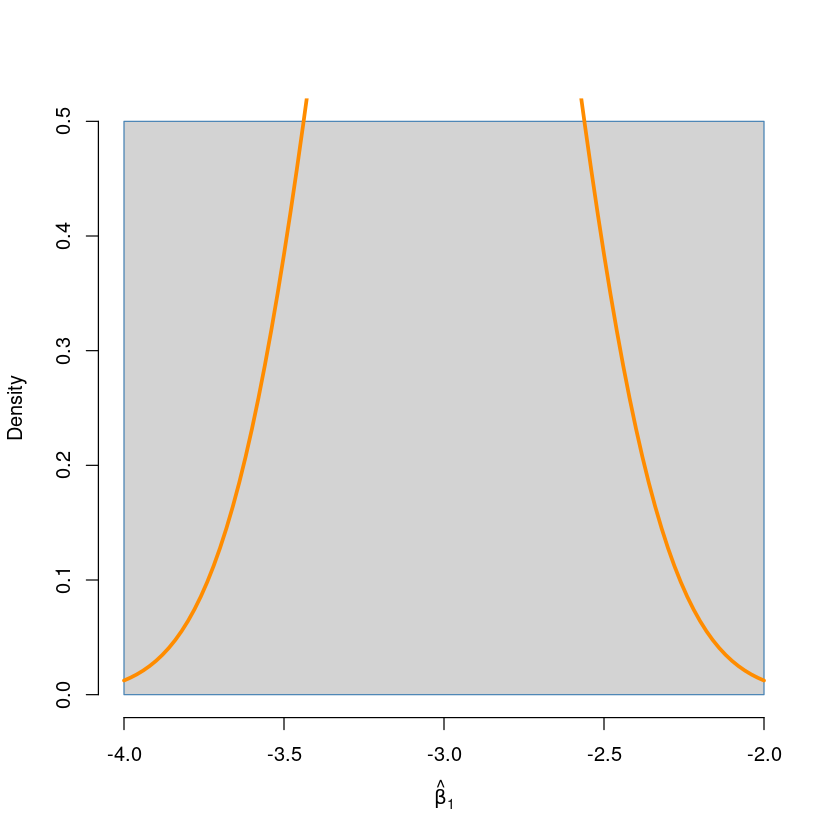

In [32]:

hist(beta1_hats, prob = TRUE, breaks = 20, 
     xlab = expression(hat(beta)[1]), main = "", border = "steelblue")  ## empirical distribution of beta1_hat
curve(dnorm(x, mean = beta1, sd = sqrt(var_beta1_hat)), 
      col = "darkorange", add = TRUE, lwd = 3)  ## true distribution of beta1_hat


## model

In [33]:
## Model1 : y = 3 + 5x + epsilon,  epsilon~N(0,1)
## Model2 : y = 3 + 5x + epsilon,  epsilon~N(0,x^2)
## Model3 : y = 3 + 5x^2 + epsilon,  epsilon~N(0,25)

- generating function

In [34]:

sim_1 = function(n) {
  x = runif(n = n) * 5
  y = 3 + 5 * x + rnorm(n = n, mean = 0, sd = 1)
  data.frame(x, y)
}

In [35]:
sim_2 = function(n) {
  x = runif(n = n) * 5
  y = 3 + 5 * x + rnorm(n = n, mean = 0, sd = x)
  data.frame(x, y)
}


In [36]:
sim_3 = function(n) {
  x = runif(n = n) * 5
  y = 3 + 5 * x ^ 2 + rnorm(n = n, mean = 0, sd = 5)
  data.frame(x, y)
}

In [37]:

n <- 200
set.seed(1004)
dt1 <- sim_1(n)
dt2 <- sim_2(n)
dt3 <- sim_3(n)




In [39]:
head(dt1)

,x,y
,<dbl>,<dbl>
1,1.358233,9.348186
2,1.229829,8.768066
3,3.893231,21.079976
4,4.895058,28.165052
5,2.173793,11.262647
6,4.570661,25.031025


In [40]:
head(dt2)

,x,y
,<dbl>,<dbl>
1,3.622810,18.645942
2,1.045306,10.137068
3,3.168525,17.546195
4,3.585000,23.911858
5,3.989679,18.895470
6,1.211359,8.320489


In [41]:

head(dt3)

,x,y
,<dbl>,<dbl>
1,4.016845,82.23803
2,3.874216,84.05972
3,2.675354,31.63082
4,4.220042,85.95100
5,3.426507,57.40688
6,2.881320,41.75378


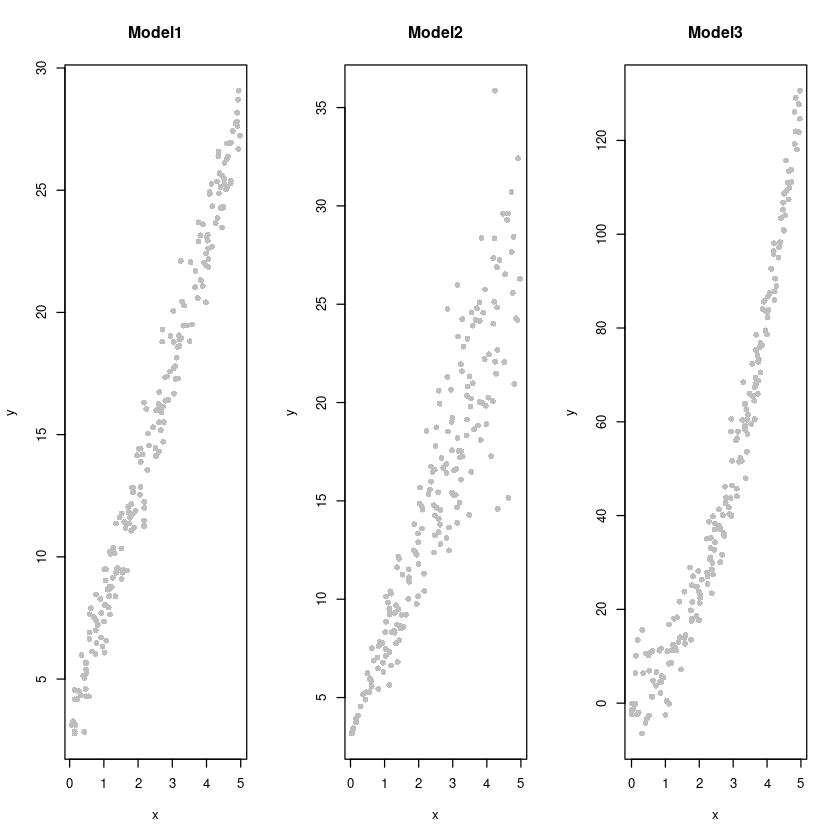

In [42]:

par(mfrow=c(1,3))
plot(y~x, dt1, col='grey', pch=16, main = "Model1")
plot(y~x, dt2, col='grey', pch=16, main = "Model2")
plot(y~x, dt3, col='grey', pch=16, main = "Model3")


In [43]:

##### model fitting

fit1 <- lm(y~x, dt1)
fit2 <- lm(y~x, dt2)
fit3 <- lm(y~x, dt3)
fit4 <- lm(y~x+I(x^2), dt3)

- fit4의 경우는 x^2을 추가 해서.. 사용한다.
- fit4 <- lm(y~x+I(x^2), dt3) 로 하면 된다.ㅇI 안쓰면 안된ㅁ


In [45]:
summary(fit3)


Call:
lm(formula = y ~ x, data = dt3)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.526  -8.086  -1.802   6.021  27.172 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -18.396      1.550  -11.87   <2e-16 ***
x             25.177      0.518   48.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.3 on 198 degrees of freedom
Multiple R-squared:  0.9227,	Adjusted R-squared:  0.9223 
F-statistic:  2362 on 1 and 198 DF,  p-value: < 2.2e-16


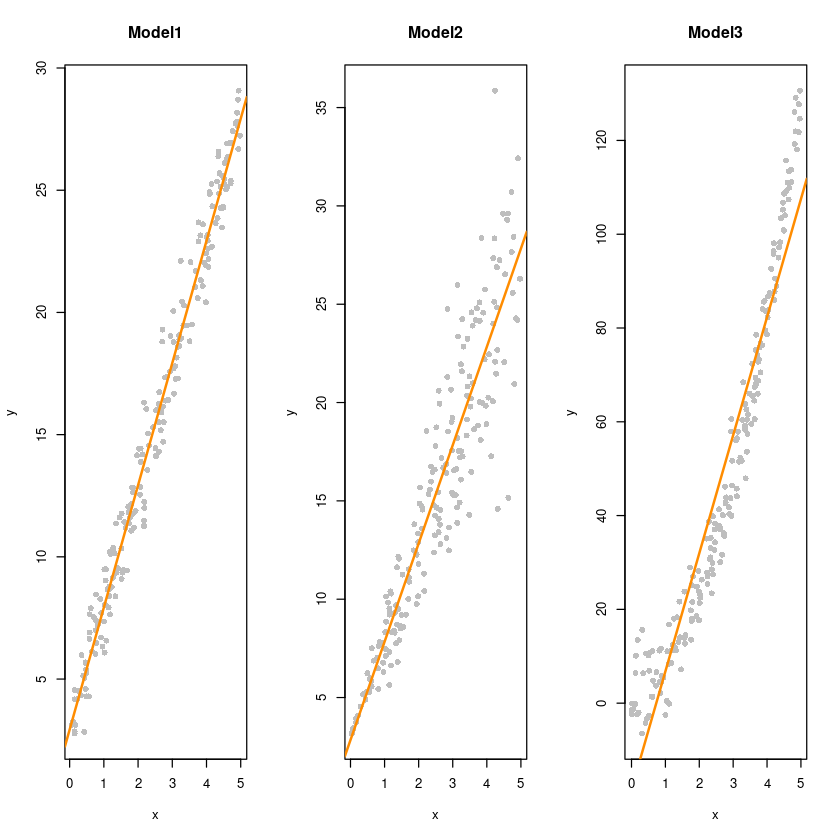

In [46]:

par(mfrow=c(1,3))
plot(y~x, dt1, col='grey', pch=16, main = "Model1")
abline(fit1, col='darkorange', lwd=2)
plot(y~x, dt2, col='grey', pch=16, main = "Model2")
abline(fit2, col='darkorange', lwd=2)
plot(y~x, dt3, col='grey', pch=16, main = "Model3")
abline(fit3, col='darkorange', lwd=2)


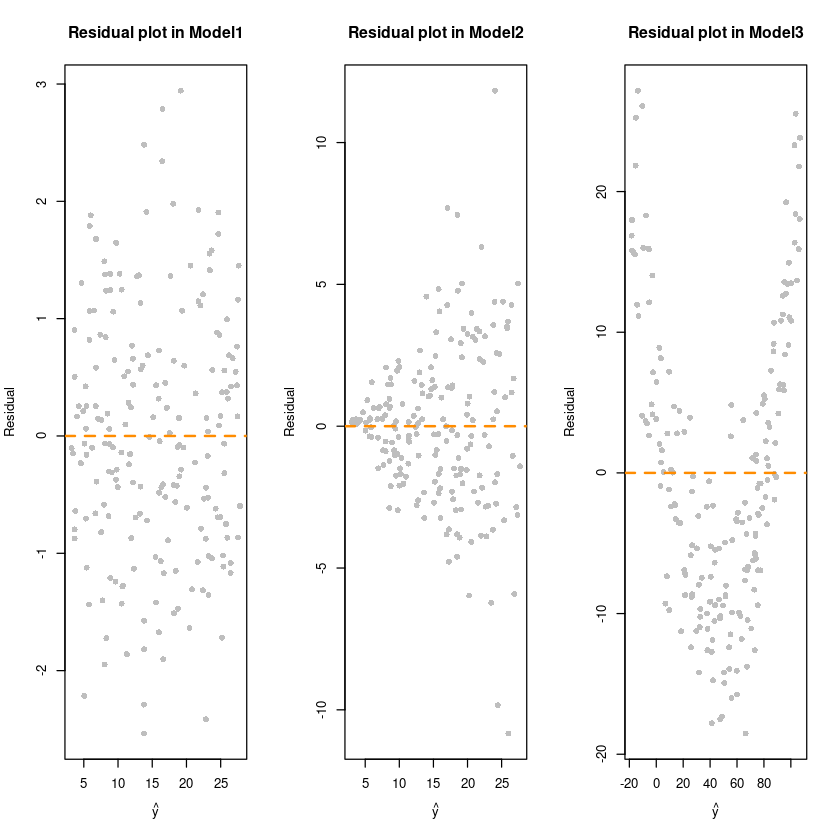

In [78]:

##### residual plot
par(mfrow=c(1,3))
plot(fitted(fit1),resid(fit1), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model1")
abline(h=0, col='darkorange', lty=2, lwd=2)

# 0에 대해서 대칭인지 확인하자!

plot(fitted(fit2),resid(fit2), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model2")
abline(h=0, col='darkorange', lty=2, lwd=2)

plot(fitted(fit3),resid(fit3), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model3")
abline(h=0, col='darkorange', lty=2, lwd=2)


## 등분산성(homoscedasticity)

In [52]:

##### 

### Breusch-Pagan Test
## H0 : 등분산  vs.  H1 : 이분산 (Heteroscedasticity)
library(lmtest)
bptest(fit1) # 0.05보다 큰값이므로 H0를 기각할 수 없다. 등분산
bptest(fit2) # H0기각 이분산이다. (오차에다가 가중치를 사용해서 분산을 안정화시켜줌. x에 비례하도록 가중치를.. 가중최소제곱추정량(WLSE))
bptest(fit3) # H0채택



	studentized Breusch-Pagan test

data:  fit1
BP = 0.11269, df = 1, p-value = 0.7371



	studentized Breusch-Pagan test

data:  fit2
BP = 26.728, df = 1, p-value = 2.342e-07



	studentized Breusch-Pagan test

data:  fit3
BP = 0.19028, df = 1, p-value = 0.6627


## 정규성 (Normality)

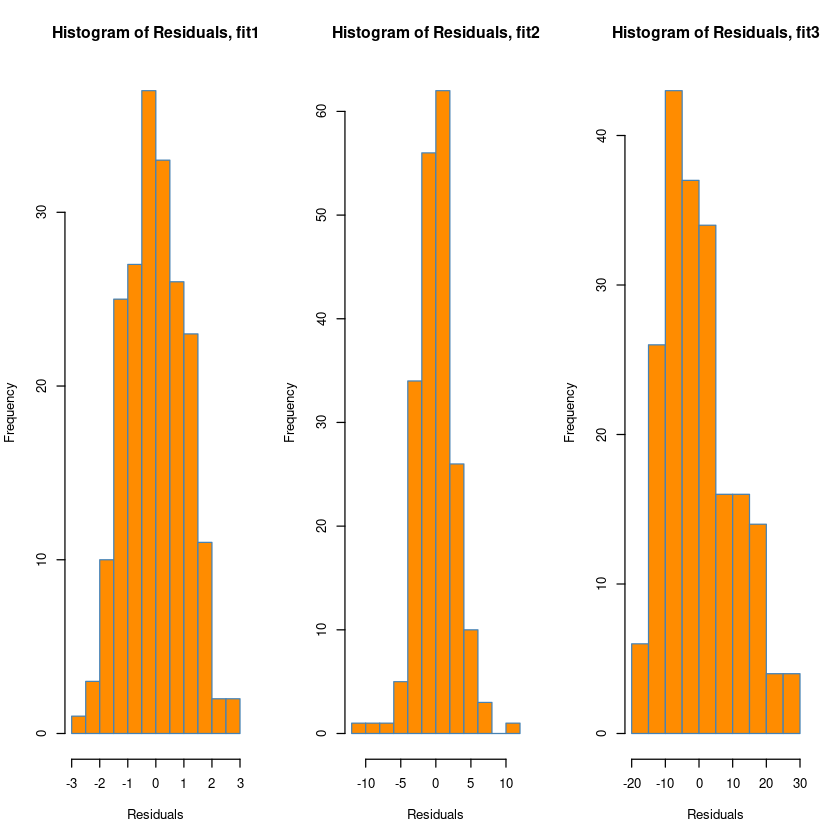

In [53]:

### Histogram of residuals
par(mfrow = c(1, 3))
hist(resid(fit1),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit1",
     col    = "darkorange",
     border = "steelblue",
     breaks = 10)
hist(resid(fit2),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit2",
     col    = "darkorange",
     border = "steelblue",
     breaks = 10)
hist(resid(fit3),  #오른쪽으로 꼬리가 길다.
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit3",
     col    = "darkorange",
     border = "steelblue",
     breaks = 10)

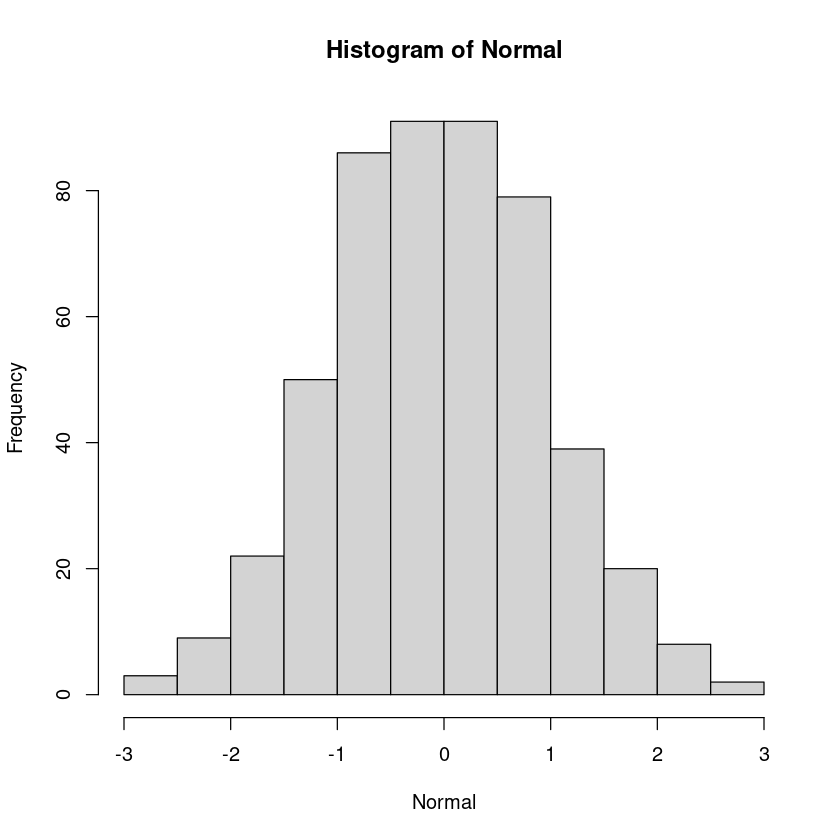

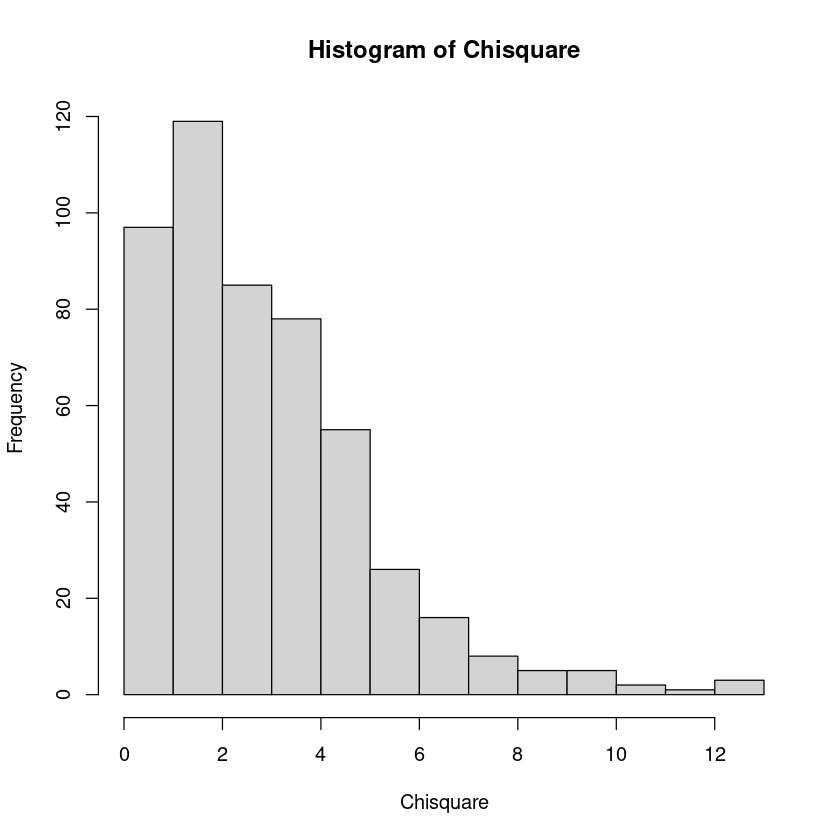

In [54]:

### QQplot
Normal<- rnorm(500)
Chisquare <- rchisq(500, 3)
hist(Normal)
hist(Chisquare)


In [55]:

# 빨간색 직선에 붙어있으면 정규분포다.
t2 <- rt(500, 3)

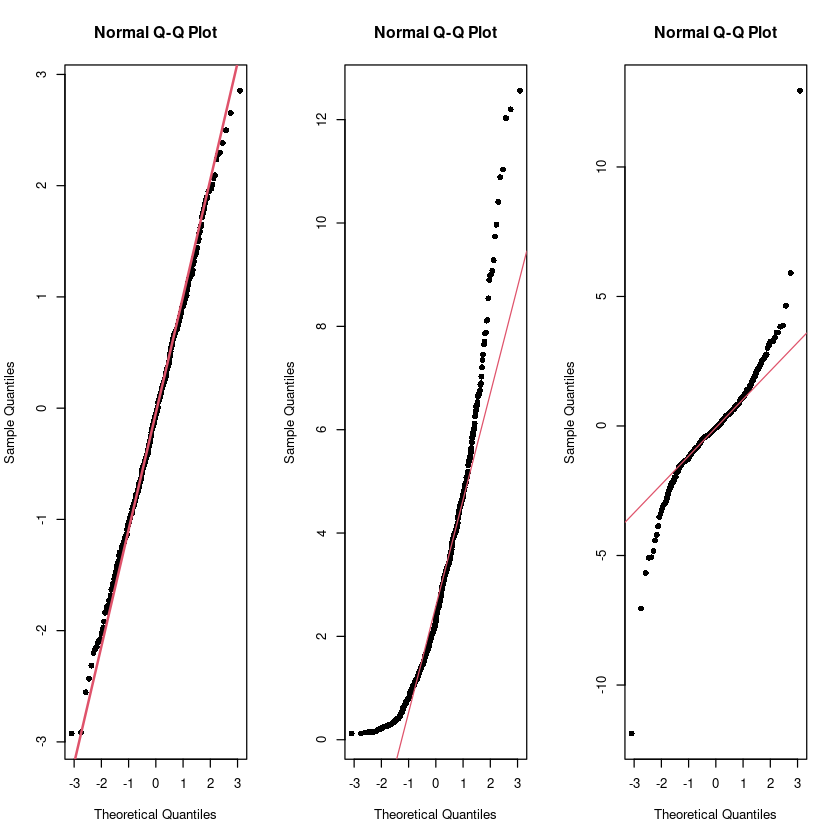

In [79]:
par(mfrow=c(1,3))
qqnorm(Normal, pch=16)
qqline(Normal, col = 2, lwd=2)


qqnorm(Chisquare, pch=16)
qqline(Chisquare, col = 2)



qqnorm(t2, pch=16)
qqline(t2, col = 2)


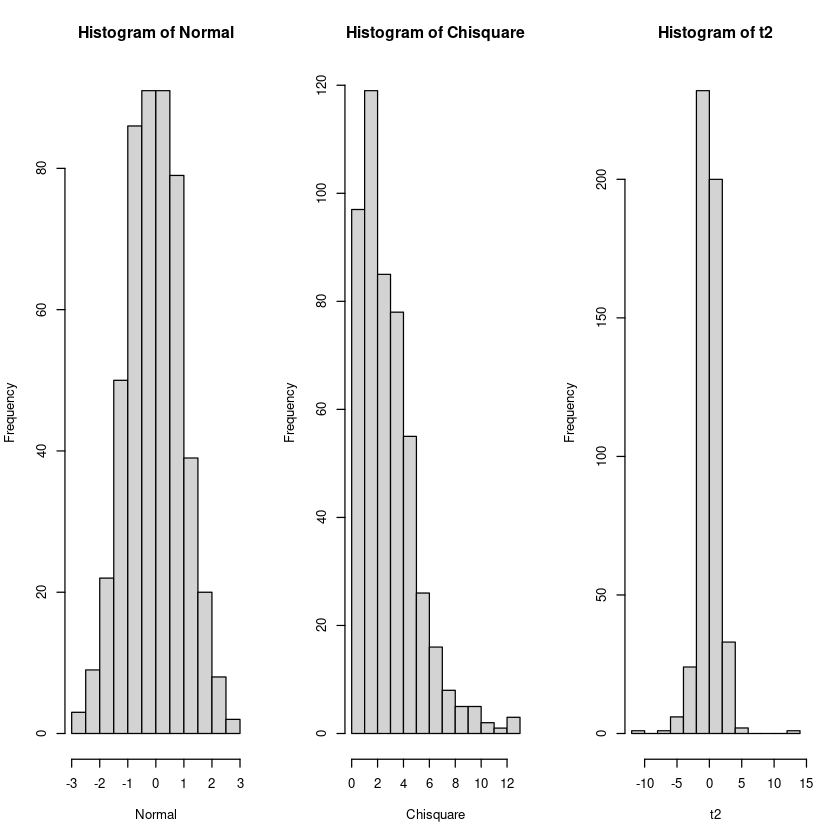

In [59]:

par(mfrow=c(1,3))
hist(Normal, breaks = 10)
hist(Chisquare, breaks = 10)
hist(t2, breaks = 10)
par(mfrow=c(1,1))


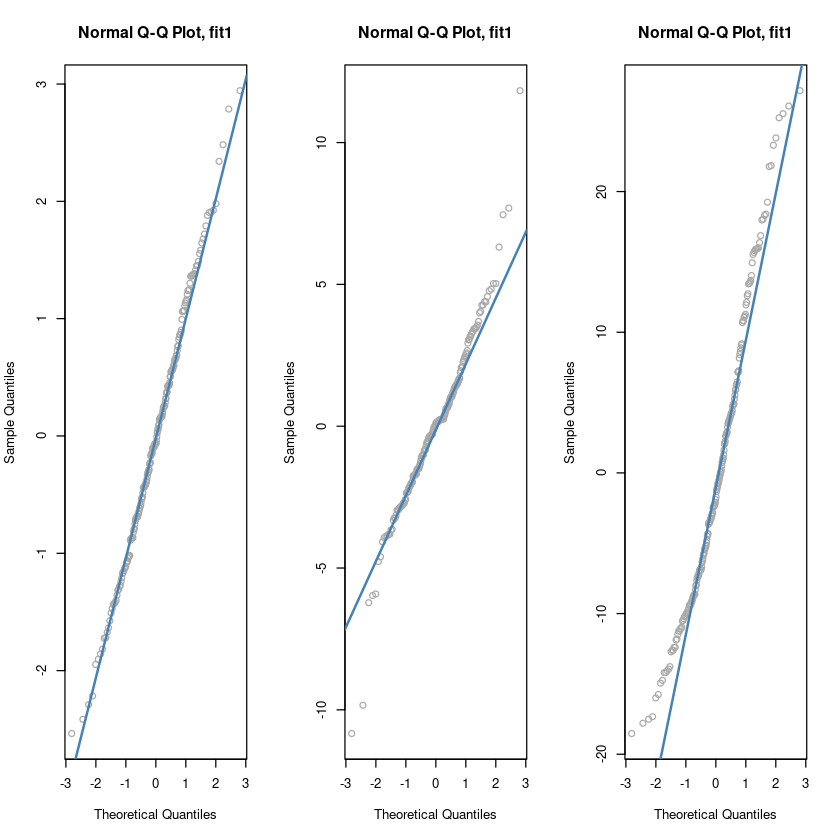

In [60]:

##
par(mfrow=c(1,3))
qqnorm(resid(fit1), main = "Normal Q-Q Plot, fit1", col = "darkgrey")
qqline(resid(fit1), col = "steelblue", lwd = 2)

qqnorm(resid(fit2), main = "Normal Q-Q Plot, fit1", col = "darkgrey")
qqline(resid(fit2), col = "steelblue", lwd = 2)

qqnorm(resid(fit3), main = "Normal Q-Q Plot, fit1", col = "darkgrey")
qqline(resid(fit3), col = "steelblue", lwd = 2)

par(mfrow=c(1,1))

## Shapiro-Wilk Test

In [61]:
## H0 : normal distribution  vs. H1 : not H0

shapiro.test(resid(fit1))
shapiro.test(resid(fit2))
shapiro.test(resid(fit3))



	Shapiro-Wilk normality test

data:  resid(fit1)
W = 0.99577, p-value = 0.8555



	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.96659, p-value = 0.0001095



	Shapiro-Wilk normality test

data:  resid(fit3)
W = 0.96354, p-value = 4.875e-05



## 독립성 : DW test


In [62]:
library(lmtest)


- Model4 : y = 3 + 5x + epsilon,  

- epsilon~N(0, var),correlated

- epsilon_i = 0.8 * epsilon_(i-1) + v_i, v_i ~ N(0,1) 


In [71]:

sim_4 = function(n) {
  e <- rep(0,n); e[1] <- rnorm(1)
  
  for(k in 2:n) {
    e[k] <- e[(k-1)]*(0.8) + rnorm(1,0,1)
  } # 오차들이 앞의 오차에 영향을 받고 있어!
  
  x = runif(n = n) * 5
  y = 3 + 5 * x  + e
  data.frame(x, y)
}

In [72]:

n <- 100
dt4 <- sim_4(n)
fit4 <- lm(y~x, dt4)


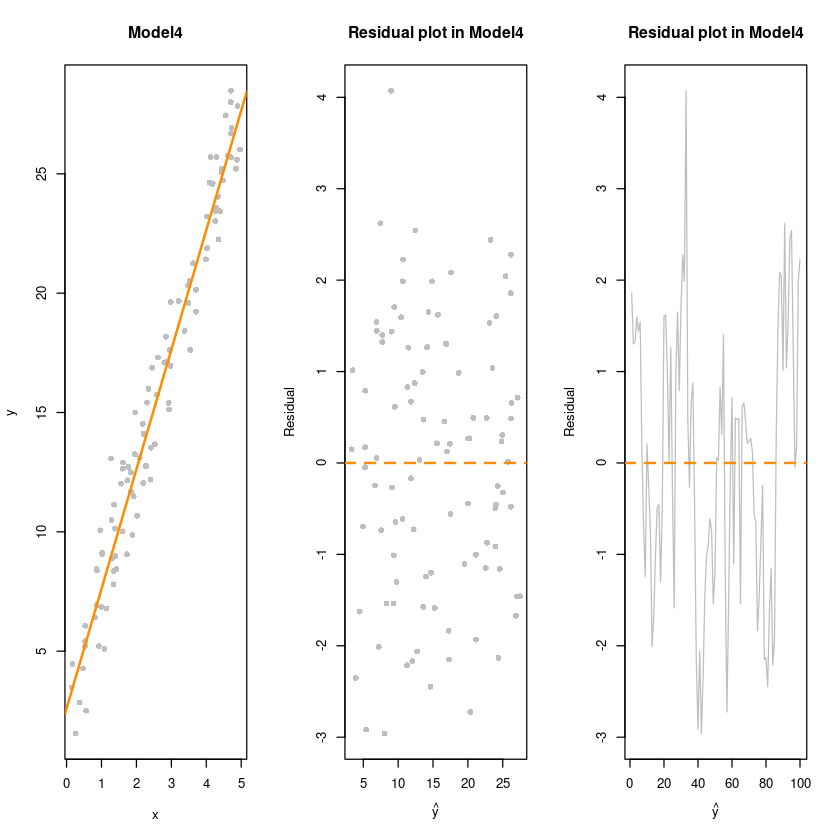

In [80]:
par(mfrow=c(1,3))
plot(y~x, dt4, col='grey', pch=16, main = "Model4")
abline(fit4, col='darkorange', lwd=2)

plot(fitted(fit4),resid(fit4), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model4")
abline(h=0, col='darkorange', lty=2, lwd=2)


plot(1:n,resid(fit4), col = 'grey', pch=16, type='l',
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model4")
abline(h=0, col='darkorange', lty=2, lwd=2)
par(mfrow=c(1,1))

In [76]:

## DWtest
#H0 : 오차들은 독립이다. 
dwtest(fit1, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
dwtest(fit2, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
dwtest(fit3, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
dwtest(fit4, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0




	Durbin-Watson test

data:  fit1
DW = 2.2176, p-value = 0.1241
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  fit2
DW = 2.3155, p-value = 0.02485
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  fit3
DW = 2.1464, p-value = 0.2966
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  fit4
DW = 0.55926, p-value = 3.234e-13
alternative hypothesis: true autocorrelation is not 0


In [77]:

dwtest(fit4, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
dwtest(fit4, alternative = "greater")  #H0 : uncorrelated vs H1 : rho > 0 양의상관관계
dwtest(fit4, alternative = "less")     #H0 : uncorrelated vs H1 : rho < 0 음의상관관계


# DW가 4에 가까울수록 음의상관관계가 크고 0에 가까울수록 양의 상관관계가 크다.




	Durbin-Watson test

data:  fit4
DW = 0.55926, p-value = 3.234e-13
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  fit4
DW = 0.55926, p-value = 1.617e-13
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  fit4
DW = 0.55926, p-value = 1
alternative hypothesis: true autocorrelation is less than 0
